In [1]:
import connect_four
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
joc = connect_four.Table()

In [3]:
joc.table

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [9]:
joc.drop(1,0)

Player 1 wins!


## Random games!

Play N games iterating over player {1,2} and random integer generator for the column

In [13]:
from itertools import cycle

In [24]:
# Player infinite generator
player_generator = (player for player in cycle([1,2])) 

In [53]:
next(player_generator)

2

In [15]:
joc.reset()
max_iter=42
simulations = 1000
results = []
for _ in range(simulations):
    rand_col_idx = np.random.randint(0,7,max_iter)
    first_drop = rand_col_idx[0]
    player_generator = (player for player in cycle([1,2])) 
    for col_idx in rand_col_idx:
        player = next(player_generator)
        game_status = joc.drop_sim(player, col_idx)
        if game_status:
            winner_info = (player, first_drop)
            break
    results.append(winner_info)
    joc.reset()

In [16]:
len(results)

1000

In [17]:
player_wins = [x[0] for x in results]
first_columns = [x[1] for x in results]

<Container object of 2 artists>

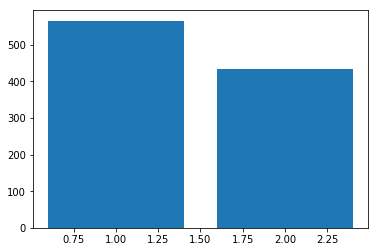

In [18]:
player_id = np.unique(player_wins, return_counts=True)[0]
n_wins = np.unique(player_wins, return_counts=True)[1]
plt.bar(player_id, n_wins, )

<Container object of 7 artists>

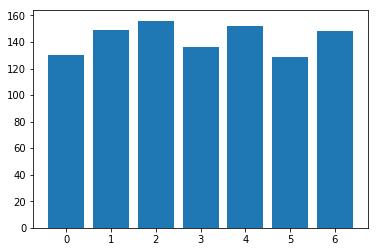

In [19]:
bars = np.unique(first_columns, return_counts=True)[1]
column_num = np.unique(first_columns, return_counts=True)[0]
plt.bar(column_num, bars)